# **1. Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

# **2. Import dataset**

In [3]:
data = '/content/car.data'

df = pd.read_csv(data, header=None)

# **3.Analisis data eksplorasi**

In [4]:
df.shape

(1728, 7)

Kita dapat melihat ada 1728 instance dan 7 variabel dalam kumpulan data.

# Lihat 5 baris kumpulan data teratas

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Ganti nama nama kolom




In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# ringkasan kumpulan data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#Distribusi frekuensi nilai dalam variabel

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


# Ringkasan variabel
Terdapat 7 variabel dalam dataset. Semua variabel bertipe data kategorikal.
Variabel-variabel tersebut adalah buying, maint, doors, persons, lug_boot, safety, dan class.
class adalah variabel target.

#variabel class

In [10]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


Variabel target class bersifat ordinal.

Bersifat ordinal berarti data memiliki urutan atau tingkatan tertentu, di mana nilai-nilai dalam variabel tersebut dapat dibandingkan secara berurutan (misalnya, dari rendah ke tinggi atau buruk ke baik). Namun, jarak antara tingkatan tidak harus sama atau memiliki nilai numerik yang spesifik. Contohnya adalah tingkat kepuasan seperti "buruk", "cukup", "baik", dan "sangat baik" yang menunjukkan urutan tapi tanpa jarak yang terukur antar kategori.



#Nilai dalam variabel tidak ada

In [11]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


Kita dapat melihat bahwa tidak ada nilai yang hilang dalam dataset. setelah telah memeriksa distribusi frekuensi nilai sebelumnya, dan itu juga mengonfirmasi bahwa tidak ada nilai yang hilang dalam dataset.

# **4.Deklarasikan vektor fitur dan variabel target**

In [12]:
X = df.drop(['class'], axis=1)
y = df['class']

# **5.Pisahkan data menjadi set pelatihan dan set pengujian terpisah.**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

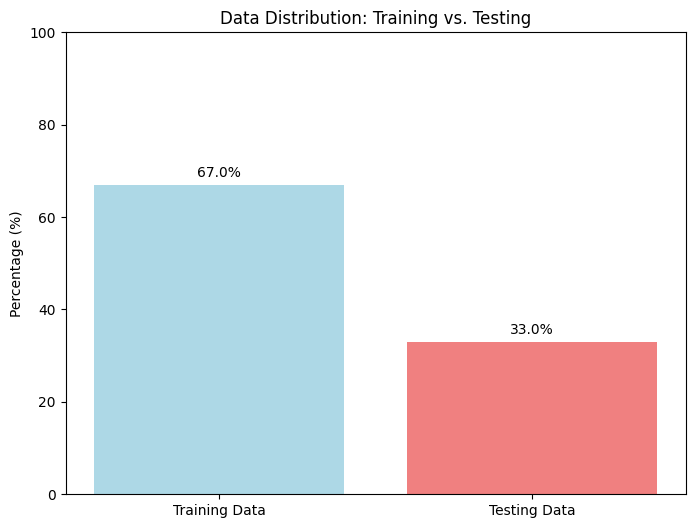

Jumlah Data Pelatihan: 1157 (66.96%)
Jumlah Data Pengujian: 571 (33.04%)


In [18]:
# prompt: BUAT CODE UNTUK MENAMPILKAN JUMLAH DATA PELATIHAN DAN JUMLAH DATA SET PENGUJIAN DAN LAKUKAN VISUALISASI DALAM BENTUK %

# Calculate the number of training and testing data
train_data_count = len(X_train)
test_data_count = len(X_test)
total_data_count = train_data_count + test_data_count

# Calculate the percentage of training and testing data
train_data_percentage = (train_data_count / total_data_count) * 100
test_data_percentage = (test_data_count / total_data_count) * 100

# Create a bar chart to visualize the data distribution
labels = ['Training Data', 'Testing Data']
sizes = [train_data_percentage, test_data_percentage]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)
plt.title('Data Distribution: Training vs. Testing')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add percentage values on top of the bars
for i, v in enumerate(sizes):
  plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

# Print the counts and percentages
print(f'Jumlah Data Pelatihan: {train_data_count} ({train_data_percentage:.2f}%)')
print(f'Jumlah Data Pengujian: {test_data_count} ({test_data_percentage:.2f}%)')

# **6.Rekayasa Fitur (Feature Engineering)**

Feature Engineering adalah proses mengubah data mentah menjadi fitur-fitur berguna yang membantu kita memahami model dengan lebih baik dan meningkatkan daya prediksinya.

In [20]:
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


#Encode categorical variables

In [21]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


Kita dapat melihat bahwa semua variabel adalah tipe data kategorikal ordinal.

In [22]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.5 MB/s eta 0:00:00


In [23]:
import category_encoders as ce

In [24]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [25]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [26]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# **7.Model Random Forest Classifier dengan parameter default**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


Di sini, y_test adalah label kelas yang sebenarnya, dan y_pred adalah label kelas yang diprediksi pada set pengujian.

Di sini,telah membangun model Random Forest Classifier dengan parameter default yaitu n_estimators = 10. Jadi,telah menggunakan 10 pohon keputusan untuk membangun model. Sekarang, akan meningkatkan jumlah pohon keputusan dan melihat pengaruhnya terhadap akurasi.

## **8.Model Random Forest Classifier dengan parameter n_estimators = 100.**

In [28]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


Skor akurasi model dengan 100 pohon keputusan: 0,9457. Skor akurasi model dengan 10 pohon keputusan adalah 0,9547, tetapi dengan 100 pohon keputusan tetap dengan nilai akurasi yang sama 0,9457. Jadi, seperti yang diharapkan, akurasi meningkat seiring bertambahnya jumlah pohon keputusan dalam model.

# **9.Temukan fitur-fitur penting dengan model Random Forest.**

# membuat model Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
safety,0.295319
persons,0.233856
buying,0.151734
maint,0.146653
lug_boot,0.100048
doors,0.072389


Kita dapat melihat bahwa fitur yang paling penting adalah safety dan fitur yang paling tidak penting adalah doors.

# **10.Visualisasikan skor fitur dari fitur-fitur tersebut**

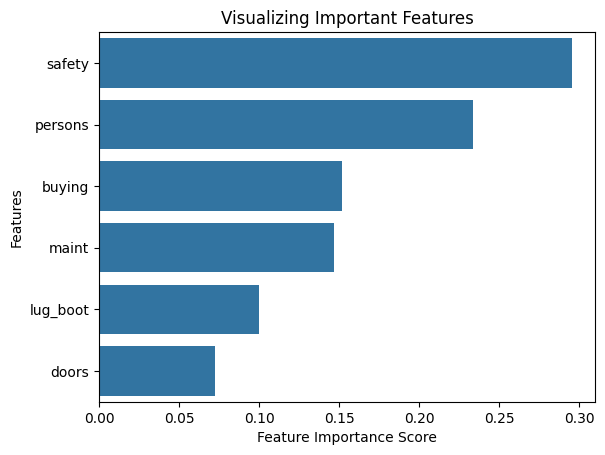

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# **11.Bangun model Random Forest pada fitur yang dipilih**

menghapus fitur yang paling tidak penting, yaitu doors, dari model, membangunnya kembali, dan memeriksa pengaruhnya terhadap akurasi.

In [ ]:
X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

membangun model Random Forest dan memeriksa akurasinya

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


1. menghapus variabel doors dari model, membangunnya kembali, dan memeriksa akurasinya. Akurasi model dengan variabel doors dihapus adalah 0,9264. Akurasi model dengan semua variabel yang diperhitungkan adalah 0,9247. Jadi, kita dapat melihat bahwa akurasi model meningkat setelah variabel doors dihapus dari model.
2. Selanjutnya, model kedua yang paling tidak penting adalah lug_boot. Jika menghapusnya dari model dan membangunnya kembali, akurasi yang ditemukan adalah 0,8546. Ini adalah penurunan yang signifikan dalam akurasi. Jadi tidak akan menghapusnya dari model.
3. Sekarang, berdasarkan analisis di atas, kita dapat menyimpulkan bahwa akurasi model klasifikasi  sangat baik. Model  menunjukkan kinerja yang sangat baik dalam memprediksi label kelas.
5. Namun, model ini tidak memberikan distribusi dasar dari nilai-nilai tersebut. Selain itu, model ini tidak memberikan informasi tentang jenis kesalahan yang dibuat oleh klasifier kita.

# **12.Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


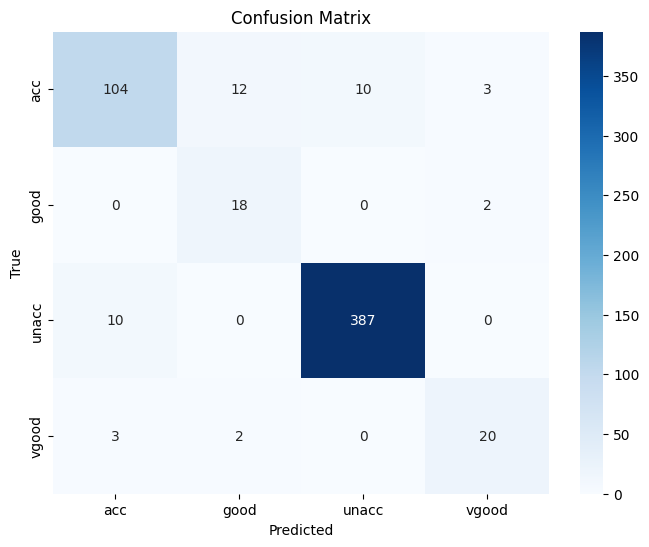

In [ ]:

# Assuming y_test and y_pred are already defined from your previous code
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['acc', 'good', 'unacc', 'vgood'],
            yticklabels=['acc', 'good', 'unacc', 'vgood'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Berdasarkan Confusion Matrix yang diberikan, maka didapatkan:

1. True Positives (TP) : Jumlah prediksi benar untuk kelas "unacc", yaitu 387
2. True Negatives (TN) : Jumlah prediksi benar untuk kelas "acc", "good", dan "vgood", yaitu 104 + 18 + 20 = 142
3. False Positives (FP) : Jumlah prediksi salah untuk kelas "unacc", yaitu 10 + 3 + 2 = 15
4. False Negatives (FN) : Jumlah prediksi salah untuk kelas "acc", "good", dan "vgood", yaitu 12 + 0 + 0 = 12
Kesimpulan:
Model ini menunjukkan performa yang baik dalam memprediksi kelas "unacc" dengan TP yang tinggi (387) dan FP yang rendah (15). Namun, model ini kurang baik dalam memprediksi kelas "acc", "good", dan "vgood" dengan FN yang tinggi (12) dan TN yang rendah (142).

# **13.Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



Pada kasus ini, model memiliki akurasi 0,93. Ini berarti model berhasil mengklasifikasikan 93% dari contoh dengan benar.
Model juga memiliki f1-score yang baik untuk kelas "unacc" (0,97), yang menunjukkan bahwa model mampu mengklasifikasikan kelas ini dengan sangat baik. Namun, model memiliki f1-score yang rendah untuk kelas "good" (0,69), yang menunjukkan bahwa model mengalami kesulitan mengklasifikasikan kelas ini dengan benar.
Secara keseluruhan, model ini menunjukkan hasil yang baik. Namun, ada beberapa ruang untuk perbaikan, terutama dalam hal mengklasifikasikan kelas "good".